In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numpoints=1000
numbins=16

In [3]:
points=np.random.normal(size=(2,numpoints))

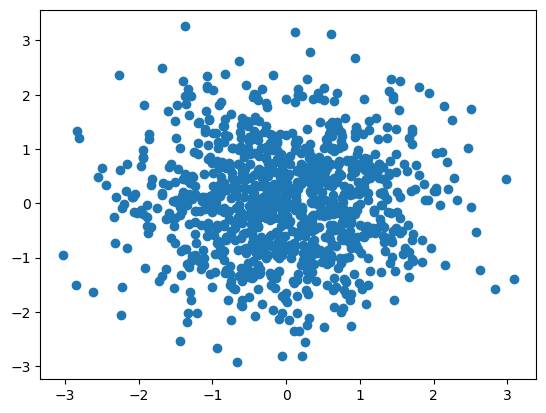

In [4]:
plt.scatter(points[0],points[1])

make a grid from -3.5 to 3.5 with intervals of one and sort points into them, so almost all points go in a bin and the bins are centered on whole numbers - after testing a few different methods i remembered that the histrogram method can just do this for me lol. also don't even need to divide by area to get density because the area of each box will just be 1 with a 1x1 grid. or could make it flexible for different numbers of boxes.

In [6]:
counts,xedges,yedges=np.histogram2d(points[0],points[1],bins=(numbins,numbins))

In [7]:
deltax=xedges[1]-xedges[0]

In [8]:
binarea=deltax**2

In [9]:
density=counts/binarea

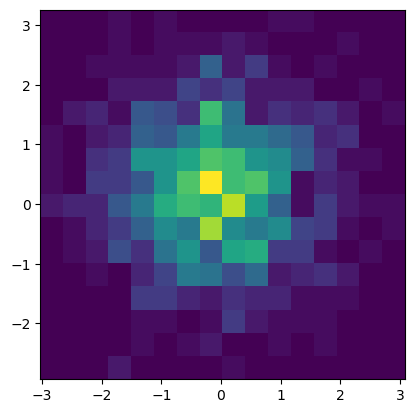

In [10]:
plt.imshow(density, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

make a function to take the points and compute the bin densities each time

In [12]:
# def densities(points,numbins):
#     counts,xedges,yedges=np.histogram2d(points[0],points[1],bins=(numbins,numbins))
#     binarea=(xedges[1]-xedges[0])**2
#     density=counts/binarea
#     return density,xedges,yedges

hmmm this would actually mean you are drawing a new grid each time. probably best to generate the edges once at the beginning and then keep the same grid? let's iterate once before writing methods

In [14]:
fftdensity=np.fft.fft2(density)

In [15]:
fftdensity.shape

(16, 16)

returning to the 2D version after better understanding the process from the 1D version

In [17]:
deltak=2*np.pi/deltax
deltal=deltak

In [18]:
#1D version of k
#k=np.arange(1,numbins+1)
#k=k*deltak

according to this https://atmos.washington.edu/~breth/classes/AM585/lect/FS_2DPoisson.pdf, instead of dividing by k^2, divide by k^2+l^2 where k and l correspond to the coordinates of the cell

In [20]:
kl = np.array([[[i, j] for j in range(1,numbins+1)] for i in range(1,numbins+1)], dtype=object) #from chatgpt

In [21]:
kl=kl*deltak #these are the coordinates in fourier space

In [22]:
kl2=np.array([[coord[0]**2 + coord[1]**2 for coord in row] for row in kl]) #from chatgpt

In [23]:
fftpotential=-fftdensity/kl2

In [24]:
potential=np.fft.ifft2(fftpotential).real

In [25]:
potentialghosts=np.pad(potential, pad_width=1, mode='edge')

now... how to compute the gradient in 2d? hmm